In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import pystan

pd.options.display.max_rows = 100

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
schools_code = """
data {
  int<lower=0> J;         // number of schools
  real y[J];              // estimated treatment effects
  real<lower=0> sigma[J]; // standard error of effect estimates
}
parameters {
  real mu;                // population treatment effect
  real<lower=0> tau;      // standard deviation in treatment effects
  vector[J] eta;          // unscaled deviation from mu by school
}
transformed parameters {
  vector[J] theta = mu + tau * eta;        // school treatment effects
}
model {
  target += normal_lpdf(eta | 0, 1);       // prior log-density
  target += normal_lpdf(y | theta, sigma); // log-likelihood
}
"""

schools_data = {"J": 8,
                "y": [28,  8, -3,  7, -1,  1, 18, 12],
                "sigma": [15, 10, 16, 11,  9, 11, 10, 18]}


In [4]:
sm = pystan.StanModel(model_code=schools_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_67cb7d0f2cb7720776cbeb52007d2dbb NOW.


In [7]:
fit = sm.sampling(data=schools_data, iter=1000, chains=4)

In [8]:
print(fit)

eta = fit.extract(permuted=True)['eta']
np.mean(eta, axis=0)

Inference for Stan model: anon_model_67cb7d0f2cb7720776cbeb52007d2dbb.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         8.25    0.15   5.06  -1.22   4.98    8.1  11.44  19.03   1152    1.0
tau        6.83    0.18   5.68   0.23   2.54   5.59   9.52  20.91    992    1.0
eta[1]     0.42    0.02   0.91  -1.34  -0.19   0.43   1.04   2.22   2194    1.0
eta[2]    -0.02    0.02   0.87  -1.71  -0.61  -0.02   0.55   1.71   1577    1.0
eta[3]    -0.18    0.02   0.88  -1.89  -0.77  -0.18    0.4   1.55   2006    1.0
eta[4]    -0.04    0.02   0.83  -1.69  -0.57  -0.06   0.48   1.64   1952    1.0
eta[5]     -0.4    0.02   0.85  -2.01  -0.96  -0.39   0.12   1.36   1971    1.0
eta[6]    -0.23    0.02   0.87  -1.92  -0.82  -0.23   0.32   1.57   2106    1.0
eta[7]     0.35    0.02   0.86  -1.41  -0.21   0.37   0.94   2.02   2220    1.0
eta[8]     0.

array([ 0.41664597, -0.02057411, -0.18367866, -0.04392185, -0.39954323,
       -0.23126166,  0.35431817,  0.04278912])

<IPython.core.display.Javascript object>


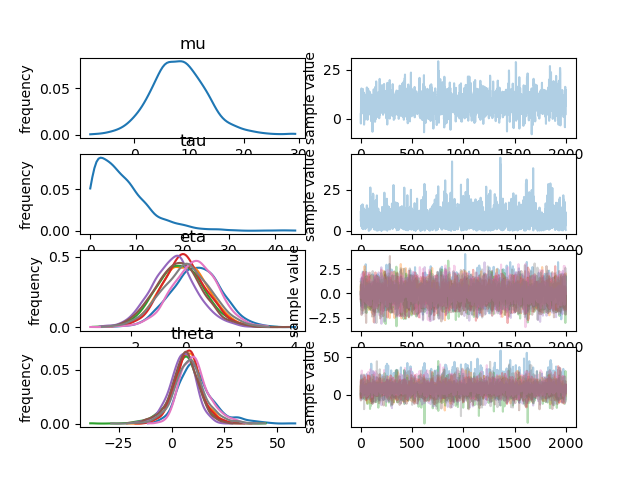

In [9]:
# if matplotlib is installed (optional, not required), a visual summary and
# traceplot are available
fit.plot()
plt.show()

<IPython.core.display.Javascript object>


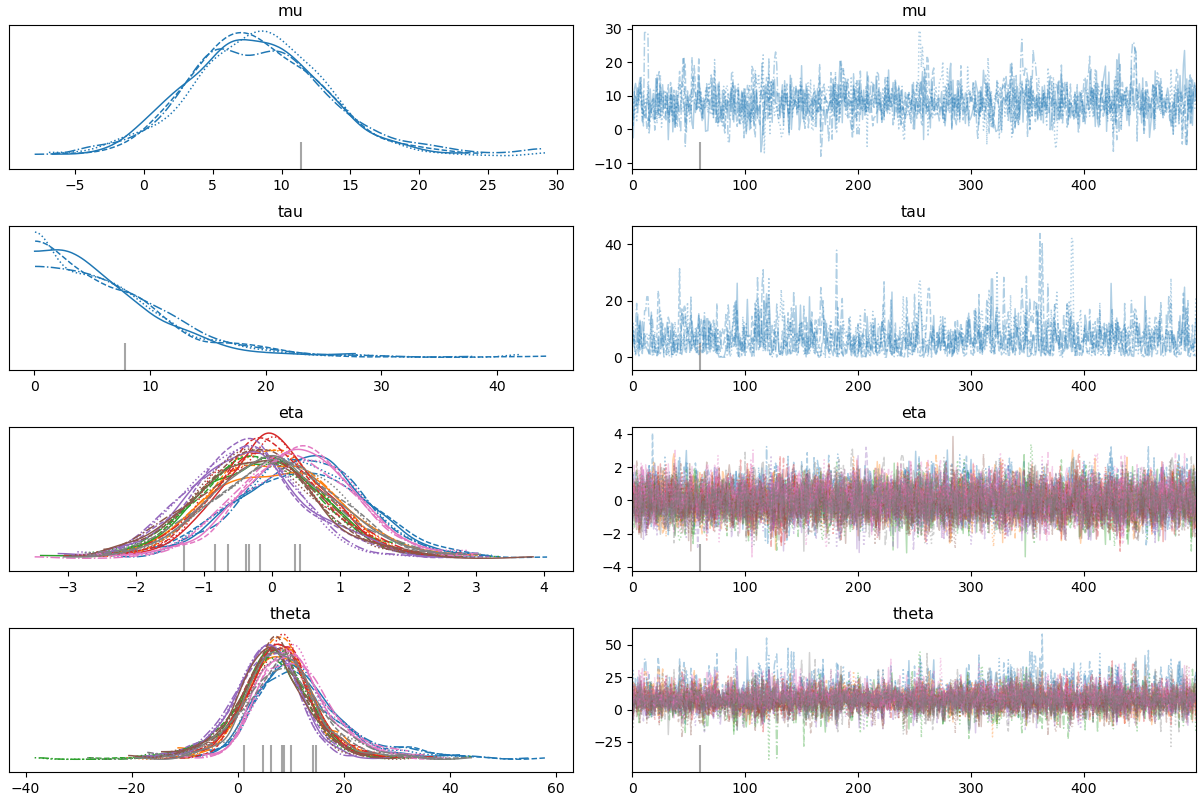

array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'tau'}>,
        <AxesSubplot:title={'center':'tau'}>],
       [<AxesSubplot:title={'center':'eta'}>,
        <AxesSubplot:title={'center':'eta'}>],
       [<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

In [12]:
# updated traceplot can be plotted with
import arviz as az
az.plot_trace(fit)

In [11]:
fit2 = pystan.stan(model_code=schools_code,
                  data=schools_data, iter=20000)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_67cb7d0f2cb7720776cbeb52007d2dbb NOW.


In [15]:
print(fit2)

Inference for Stan model: anon_model_67cb7d0f2cb7720776cbeb52007d2dbb.
4 chains, each with iter=20000; warmup=10000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=40000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.85    0.05   5.08  -2.25   4.62   7.88  11.09   18.0  12231    1.0
tau        6.53    0.05   5.47   0.23   2.45   5.27   9.15  20.56  11813    1.0
eta[1]     0.38  5.4e-3   0.94  -1.51  -0.24   0.41   1.01   2.19  30773    1.0
eta[2]   3.0e-3  4.8e-3   0.88  -1.72  -0.57 2.6e-3   0.58   1.74  32613    1.0
eta[3]    -0.19  5.0e-3   0.93   -2.0  -0.82   -0.2   0.43   1.64  35285    1.0
eta[4]    -0.03  5.0e-3   0.89  -1.79  -0.61  -0.03   0.55   1.71  32215    1.0
eta[5]    -0.35  5.0e-3   0.88  -2.04  -0.93  -0.36   0.22   1.46  30633    1.0
eta[6]    -0.21  4.9e-3   0.89  -1.94  -0.79  -0.22   0.37   1.59  32691    1.0
eta[7]     0.36  5.2e-3   0.89  -1.46  -0.21   0.37   0.95   2.08  28988    1.0
eta[8] 

In [19]:
eta = fit2.extract(permuted=True)['eta']
print(eta.shape)

(40000, 8)


<IPython.core.display.Javascript object>


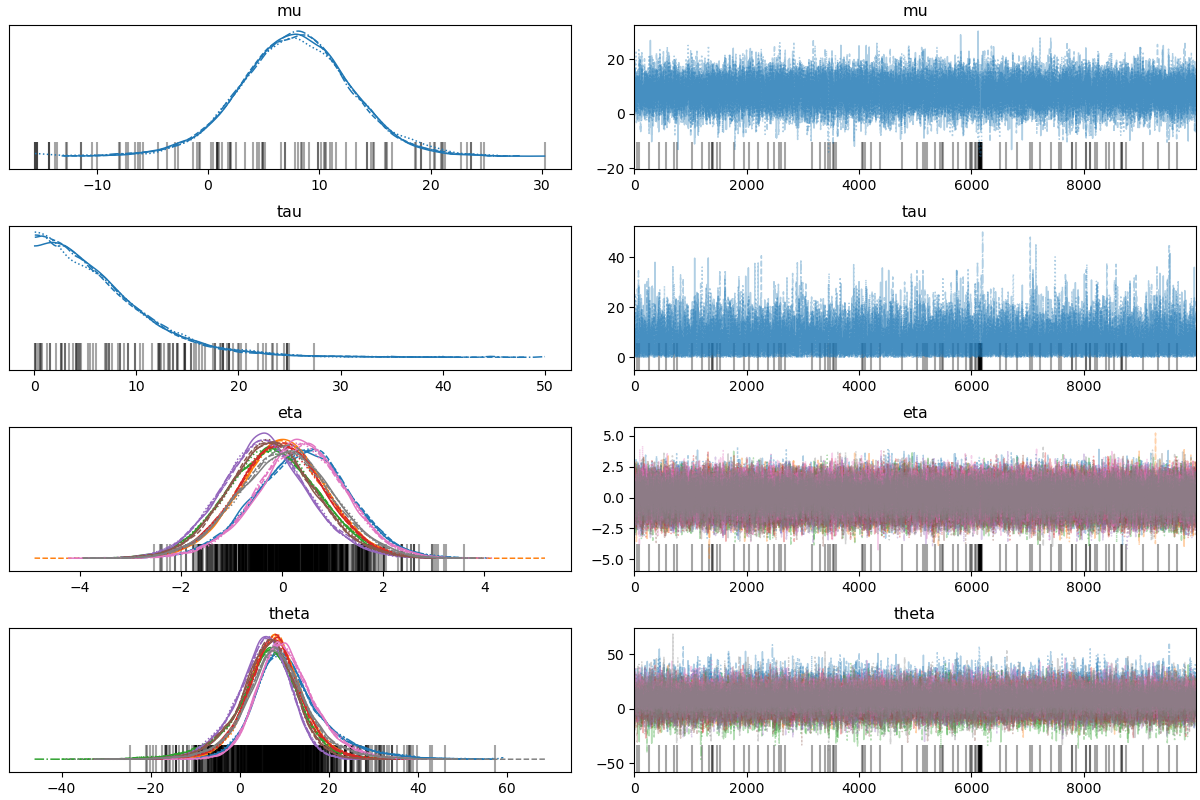

array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'tau'}>,
        <AxesSubplot:title={'center':'tau'}>],
       [<AxesSubplot:title={'center':'eta'}>,
        <AxesSubplot:title={'center':'eta'}>],
       [<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

In [13]:
az.plot_trace(fit2)